## Imports

In [1]:
from itertools import product

from math import pi

import matplotlib.pyplot as plt

import numpy as np
from numpy import random

import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2, RFE

from xgboost import XGBClassifier, XGBRFClassifier

## Read Data and Set Index

In [2]:
train = pd.read_csv('train.csv').set_index('id')
submission_full = pd.read_csv('test.csv').set_index('id')

## Drop Columns with a Domain of Only One Value

In [3]:
train = train.drop(['EmployeeCount','Over18','StandardHours'], axis=1) 
submission = submission_full.drop(['EmployeeCount','Over18','StandardHours'], axis=1) 

## Define Data Types
#### float => numerical feature
#### other => categorical feature

In [4]:
train = train.astype({
    "Age": float,
    "DailyRate": float,
    "DistanceFromHome": float,
    "Education": float,
    "EnvironmentSatisfaction": float,
    "HourlyRate": float,
    "JobInvolvement": float,
    "JobLevel": float,
    "JobSatisfaction": float,
    "MonthlyIncome": float,
    "MonthlyRate": float,
    "NumCompaniesWorked": float,
    "PercentSalaryHike": float,
    "PerformanceRating": float,
    "RelationshipSatisfaction": float,
    "StockOptionLevel": float,
    "TotalWorkingYears": float,
    "TrainingTimesLastYear": float,
    "WorkLifeBalance": float,
    "YearsAtCompany": float,
    "YearsInCurrentRole": float,
    "YearsSinceLastPromotion": float,
    "YearsWithCurrManager": float
})

submission = submission.astype({
    "Age": float,
    "DailyRate": float,
    "DistanceFromHome": float,
    "Education": float,
    "EnvironmentSatisfaction": float,
    "HourlyRate": float,
    "JobInvolvement": float,
    "JobLevel": float,
    "JobSatisfaction": float,
    "MonthlyIncome": float,
    "MonthlyRate": float,
    "NumCompaniesWorked": float,
    "PercentSalaryHike": float,
    "PerformanceRating": float,
    "RelationshipSatisfaction": float,
    "StockOptionLevel": float,
    "TotalWorkingYears": float,
    "TrainingTimesLastYear": float,
    "WorkLifeBalance": float,
    "YearsAtCompany": float,
    "YearsInCurrentRole": float,
    "YearsSinceLastPromotion": float,
    "YearsWithCurrManager": float
})

## Exploratory Data Analysis

### Pie chart: Distribution of Attrition

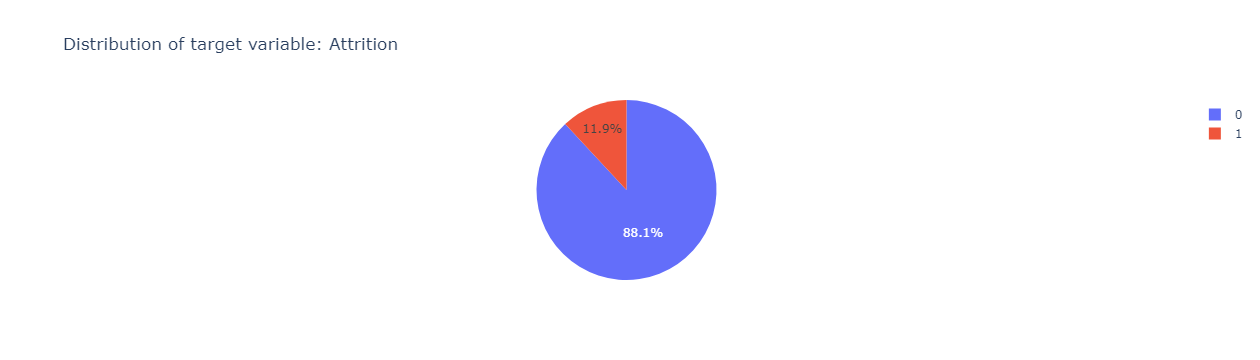

In [5]:
pie_chart = px.pie(data_frame = train, 
                   names = 'Attrition', title ='Distribution of target variable: Attrition') 
pie_chart.show()

### Bar charts: Distribution of Numerical Variables

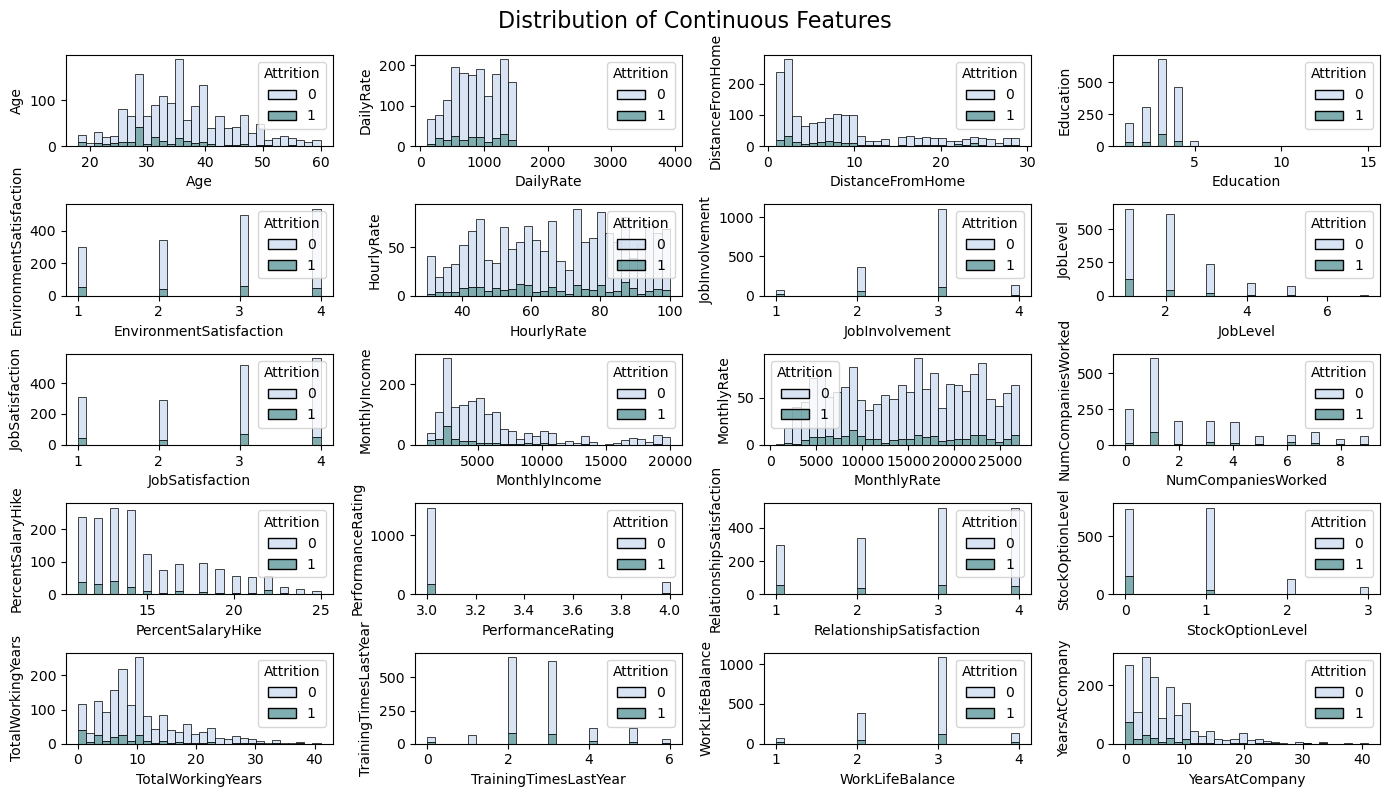

In [6]:
# color palette
palette_1 = sns.cubehelix_palette(start=2, n_colors=5, rot=0.3, dark=0.5)
palette_2 = sns.cubehelix_palette(start=2, n_colors=2, rot=0.3, dark=0.5)

cols = train.select_dtypes(["float"]).columns
              
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(14,8), dpi=100)
fig.suptitle('Distribution of Continuous Features', y=0.99, fontsize=16);
for col, ax in zip(cols, axes.ravel()):
    sns.histplot(data=train, x=col, hue='Attrition', bins=30, palette=palette_2, ax=ax, multiple='stack')
    ax.set_ylabel(col)
        
plt.tight_layout()

### Highlights

In [7]:
# Count the number of males and females
gender_counts = train['Gender'].value_counts()

# Calculate the gender ratio
gender_ratio = gender_counts['Male'] / gender_counts['Female']

# Print the result
print("The gender ratio between male and female is:", gender_ratio)

The gender ratio between male and female is: 1.735725938009788


In [8]:
average_age = train['Age'].mean()

# Print the result
print("The average age of employees is:", average_age)

The average age of employees is: 36.036970781156825


In [9]:
average_satisfaction = train['EnvironmentSatisfaction'].mean()

# Print the result
print("The average Environment Satisfaction is :", average_satisfaction)

The average Environment Satisfaction is : 2.7579010137149673


In [10]:
#Count the number of employees in each department
department_counts = train['Department'].value_counts()

# Calculate the percentage of employees in each department to the total
department_percentages = department_counts / department_counts.sum() * 100

# Print the result
print("The percentage of employees in each department to the total:\n", department_percentages)

The percentage of employees in each department to the total:
 Research & Development    69.588551
Sales                     28.085868
Human Resources            2.325581
Name: Department, dtype: float64


## Scatter Plots (Outlier Detection)

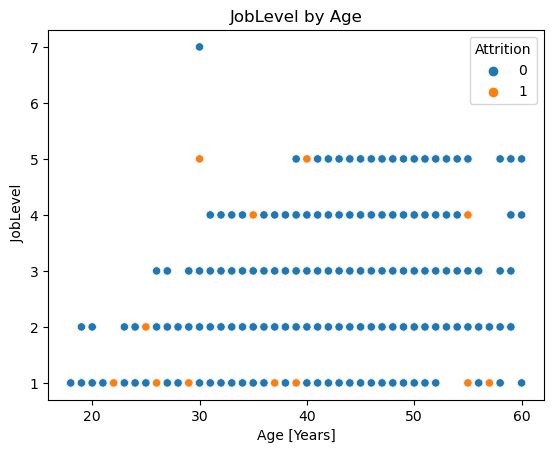

In [11]:
sns.scatterplot(data=train, x='Age', y='JobLevel', hue= 'Attrition').set(title='JobLevel by Age')
plt.xlabel("Age [Years]")
plt.ylabel(" JobLevel")
plt.show()

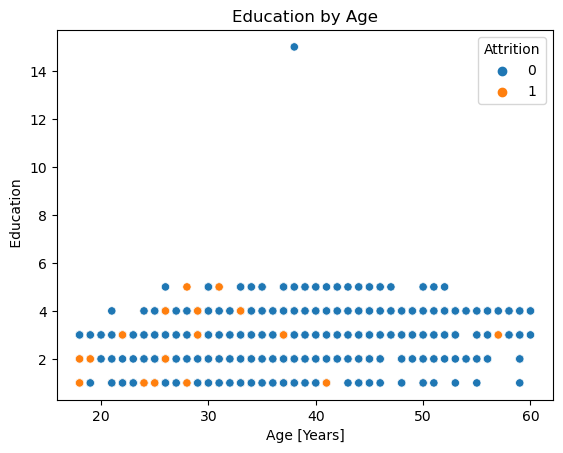

In [12]:
sns.scatterplot(data=train, x='Age', y='Education', hue= 'Attrition').set(title='Education by Age')
plt.xlabel("Age [Years]")
plt.ylabel(" Education")
plt.show()

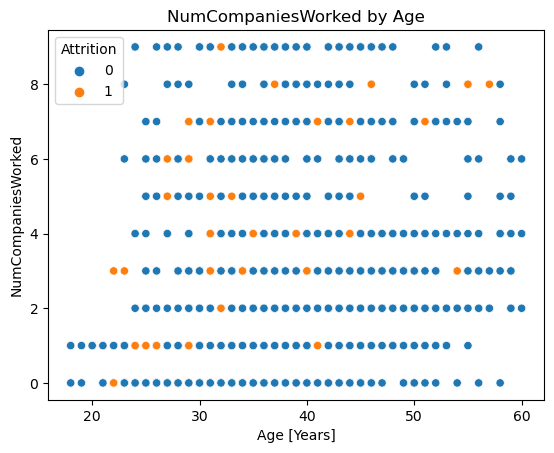

In [13]:
sns.scatterplot(data=train, x='Age', y='NumCompaniesWorked', hue= 'Attrition').set(title='NumCompaniesWorked by Age')
plt.xlabel("Age [Years]")
plt.ylabel("NumCompaniesWorked")
plt.show()

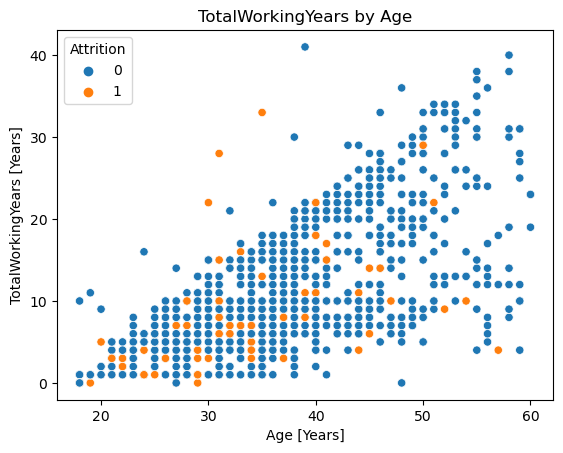

In [14]:
sns.scatterplot(data=train, x='Age', y='TotalWorkingYears', hue= 'Attrition').set(title='TotalWorkingYears by Age')
plt.xlabel("Age [Years]")
plt.ylabel("TotalWorkingYears [Years]")
plt.show()

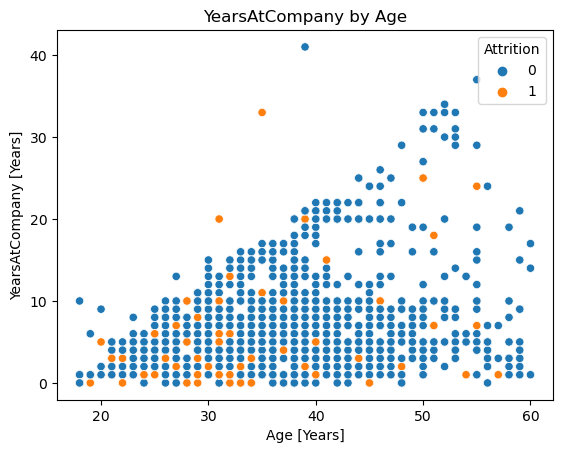

In [15]:
sns.scatterplot(data=train, x='Age', y='YearsAtCompany', hue= 'Attrition').set(title='YearsAtCompany by Age')
plt.xlabel("Age [Years]")
plt.ylabel("YearsAtCompany [Years]")
plt.show()

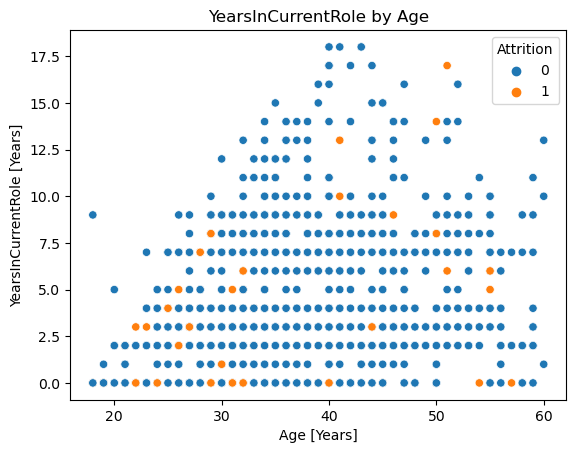

In [16]:
sns.scatterplot(data=train, x='Age', y='YearsInCurrentRole', hue= 'Attrition').set(title='YearsInCurrentRole by Age')
plt.xlabel("Age [Years]")
plt.ylabel("YearsInCurrentRole [Years]")
plt.show()

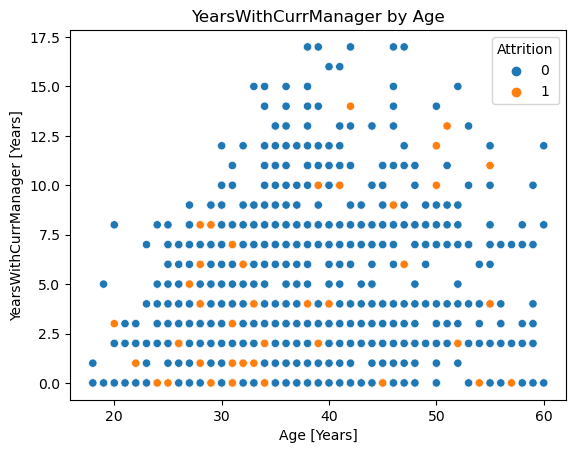

In [17]:
sns.scatterplot(data=train, x='Age', y='YearsWithCurrManager', hue= 'Attrition').set(title='YearsWithCurrManager by Age')
plt.xlabel("Age [Years]")
plt.ylabel("YearsWithCurrManager [Years]")
plt.show()

## Handling Outliers

In [18]:
train.Education = np.where(train.Education == 15, 5, train.Education) # only person with Education 15
train.JobLevel = np.where(train.JobLevel == 7, 5, train.JobLevel) # only person with Job Level 7


In [19]:
#changing 0 to 1 for NumCompaniesWorked
train.NumCompaniesWorked = np.where(train.NumCompaniesWorked == 0, 1, train.NumCompaniesWorked) 

In [20]:
# assuming that you can start working at the age of 18
train.TotalWorkingYears = np.where(train.Age - train.TotalWorkingYears < 18, train.Age - 18, train.TotalWorkingYears) 
train.YearsAtCompany = np.where(train.Age - train.YearsAtCompany < 18, train.Age - 18, train.YearsAtCompany) 
train.YearsInCurrentRole = np.where(train.Age - train.YearsInCurrentRole < 18, train.Age - 18, train.YearsInCurrentRole) 
train.YearsWithCurrManager = np.where(train.Age - train.YearsWithCurrManager < 18, train.Age - 18, train.YearsWithCurrManager) 

## Correlation Matrix

C:\Users\catta\AppData\Local\Temp\ipykernel_4180\3637295302.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

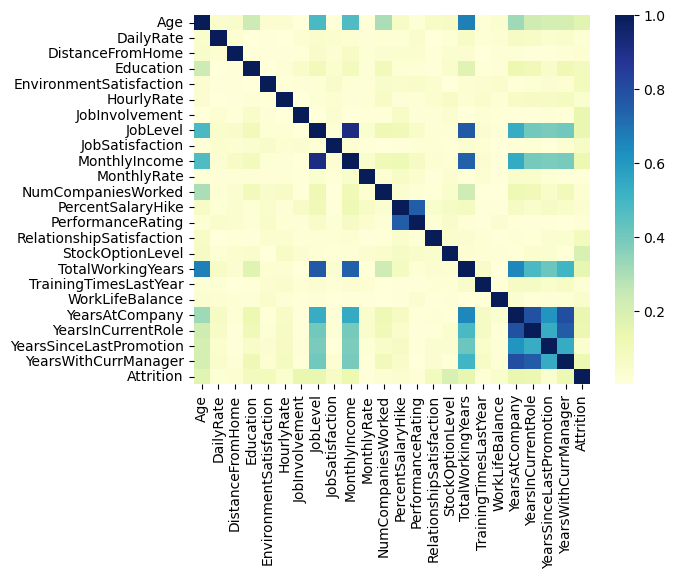

In [21]:
# Heatmap
corr = train.corr().abs() 
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

### Dropping Irrelevant Features 
#### I.e., features that have a high correlation with other features. Out of these features, we only keep the feature with the highest correlation with the target variable.

In [22]:
train = train.drop(['MonthlyIncome'], axis=1) 
train = train.drop(['TotalWorkingYears'], axis=1) 
train = train.drop(['PerformanceRating'], axis=1) 
train = train.drop(['YearsWithCurrManager'], axis=1) 
train = train.drop(['YearsAtCompany'], axis=1) 


submission = submission.drop(['MonthlyIncome'], axis=1) 
submission = submission.drop(['TotalWorkingYears'], axis=1) 
submission = submission.drop(['PerformanceRating'], axis=1) 
submission = submission.drop(['YearsWithCurrManager'], axis=1) 
submission = submission.drop(['YearsAtCompany'], axis=1) 

## Modify Age using Cosine
### We modified the feature 'Age' by using cosine to convert the distribution into a linear behaviour.

In [23]:
train['AgeCosine'] = np.cos((train.Age + 42) / 181* 2 * pi)
submission['AgeCosine'] = np.cos((submission.Age + 42) / 181* 2 * pi)

train = train.drop(['Age'], axis=1) 
submission = submission.drop(['Age'], axis=1) 

## Calculate Features

#### We created new features by calculating ration using existing features. However, analyzing their impact on the predictions, we did not consider them as they do not improve the performance of the model. 

In [24]:
#train['YearsCurrentManagerPerTotalYears'] = train.YearsWithCurrManager / train.TotalWorkingYears
#train['YearsCurrentRolePerTotalYears'] = train.YearsInCurrentRole / train.TotalWorkingYears
#train['IncomePerAge'] = train.MonthlyIncome / train.Age

## Split in Feature Matrix and Target Vector

In [25]:
X_full = train.drop(columns=['Attrition'])
y_full = train['Attrition']

## Keep 10% of the Data to Trim the AUC Threshold of the Final Model

In [26]:
X, X_test, y, y_test = train_test_split(X_full, y_full, stratify = y_full, random_state = 42, test_size = 0.2)

## Preprocessing

In [27]:
categorical_columns = X.select_dtypes(["O","int"]).columns
numerical_columns = X.select_dtypes(["float"]).columns

preprocessing = ColumnTransformer(
    [
        (
            "ohe",
            OneHotEncoder(sparse_output=False),
            categorical_columns
        ),
        (
            "scaler",
            StandardScaler(),
            numerical_columns
        )
    ],
    remainder="drop"  
)

## Model: LogisticRegression

In [ ]:
#Select features using SelectKBest

for i in [10, 15, 20, 25, 30, 35, 40, 45, 50]:
    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('selection', SelectKBest(k = i)),
        ('clf', LogisticRegression(solver='liblinear', max_iter=1000, random_state = 42))
    ])

    # define the hyperparameter grid
    params = {
        'clf__C': np.logspace(-4,2,1000), 
        'clf__penalty': ['l1','l2'],
        'clf__class_weight': [None, 'balanced']
        
    } 

    # train the model using grid search
    model = RandomizedSearchCV(
        pipeline, 
        params, 
        n_iter = 100, 
        scoring = 'roc_auc', 
        cv = 5, 
        refit = True
    )

    model.fit(X, y)

    model.best_score_

    # print the best hyperparameters and corresponding score
    print("Best parameters: k =",i,' ', model.best_params_)
    print("Best score: k =",i,' ', model.best_score_)

In [ ]:
#Select features using RFE

for i in [10, 15, 20, 25, 30, 35, 40, 45, 50]:

    pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ('selection', RFE(LogisticRegression(solver='liblinear', max_iter=1000, random_state = 42), n_features_to_select=i, step=1)),
        ('clf', LogisticRegression(solver='liblinear', max_iter=1000, random_state = 42))
    ])

    # define the hyperparameter grid
    params = {
        'clf__C': np.logspace(-4,2,1000), 
        'clf__penalty': ['l1','l2'],
        'clf__class_weight': [None, 'balanced']

    } 

    # train the model using grid search
    model = RandomizedSearchCV(
        pipeline, 
        params, 
        n_iter = 100, 
        scoring = 'roc_auc', 
        cv = 5, 
        refit = True
    )

    model.fit(X, y)

    model.best_score_

    # print the best hyperparameters and corresponding score
    print("Best parameters: n_features_to_select =",i,' ', model.best_params_)
    print("Best score: n_features_to_select =",i,' ', model.best_score_)

## Model: GaussianNaiveBayes

In [ ]:
pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ('clf', GaussianNB())
])

params = {}

model = RandomizedSearchCV(
    pipeline, 
    params, 
    n_iter = 100, 
    scoring = 'roc_auc', 
    cv = 5, 
    refit = True
)

model.fit(X, y)

model.best_score_

The Gaussian Naive Bayes shows the lowest result with an ROC-AUC score of ~75%, which is why we do not further elaborate on this algorithm.

## Model: RandomForest

In [ ]:
#Select features using SelectKBest

for i in [10, 15, 20, 25, 30, 35, 40, 45, 50]:
    
    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('selection', SelectKBest(k = i)),
        ('clf', RandomForestClassifier(random_state = 42))
    ])

    # define the hyperparameter grid
    params = {
        'clf__max_depth': [10, 15, 20, 25, 30, 35], 
        'clf__min_samples_leaf': np.logspace(1,2,100, dtype = int),  
        'clf__min_samples_split': [2,4,8,16,32,64,128,256,512,1024], 
        'clf__n_estimators':[60, 70, 80, 90, 100]
        
    } 

    # train the model using grid search
    model = RandomizedSearchCV(
        pipeline, 
        params, 
        n_iter = 100, 
        scoring = 'roc_auc', 
        cv = 5, 
        refit = True
    )

    model.fit(X, y)

    model.best_score_

    # print the best hyperparameters and corresponding score
    print("Best parameters: k =",i,' ', model.best_params_)
    print("Best score: k =",i,' ', model.best_score_)

In [ ]:
#Select features using RFE

for i in [10, 15, 20, 25, 30, 35, 40, 45, 50]:
    
    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('selection', RFE(RandomForestClassifier(random_state = 42), n_features_to_select=i, step=1)),
        ('clf', RandomForestClassifier(random_state = 42))
    ])

    # define the hyperparameter grid
    params = {
        'clf__max_depth': [10, 15, 20, 25, 30, 35], 
        'clf__min_samples_leaf': np.logspace(1,2,100, dtype = int),  
        'clf__min_samples_split': [2,4,8,16,32,64,128,256,512,1024], 
        'clf__n_estimators':[60, 70, 80, 90, 100]
        
    } 

    # train the model using grid search
    model = RandomizedSearchCV(
        pipeline, 
        params, 
        n_iter = 100, 
        scoring = 'roc_auc', 
        cv = 5, 
        refit = True
    )

    model.fit(X, y)

    model.best_score_

    # print the best hyperparameters and corresponding score
    print("Best parameters: n_features_to_select =",i,' ', model.best_params_)
    print("Best score: n_features_to_select =",i,' ', model.best_score_)

## Model: XGBoost

In [ ]:
#Select features using SelectKBest

for i in [10, 15, 20, 25, 30, 35, 40, 45, 50]:
    
    pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ('selection', SelectKBest(k = i)),
        ('clf', XGBClassifier(random_state = 42))
    ])

    # define the hyperparameter grid
    params = {
        'clf__learning_rate': np.arange(0.001, 1, 0.05), #adjustment of weights
        'clf__max_depth': np.arange(3,6,1), #maximum depth of each tree
        'clf__n_estimators': np.arange(100,250,50), #number of trees
        'clf__subsample': [0.6, 0.8, 1.0], #percentage of rows used to train a tree (randomly sampled for each tree)
        'clf__colsample_bytree': [0.6, 0.8, 1.0] #percentage of columns used to train a tree (randomly sampled for each tree)
    } 

    # train the model using grid search
    model = RandomizedSearchCV(
        pipeline, 
        params, 
        n_iter = 100, 
        scoring = 'roc_auc', 
        cv = 5, 
        refit = True
    )

    model.fit(X, y)

    model.best_score_

    # print the best hyperparameters and corresponding score
    print("Best parameters: k =",i,' ', model.best_params_)
    print("Best score: k =",i,' ', model.best_score_)

In [ ]:
#Select features using RFE

for i in [10, 15, 20, 25, 30, 35, 40, 45, 50]:
    
    pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ('selection', RFE(DecisionTreeClassifier(random_state = 42), n_features_to_select=i, step=1)),
        ('clf', XGBClassifier(random_state = 42))
    ])

    # define the hyperparameter grid
    params = {
        'clf__learning_rate': np.arange(0.001, 1, 0.05), #adjustment of weights
        'clf__max_depth': np.arange(3,6,1), #maximum depth of each tree
        'clf__n_estimators': np.arange(100,250,50), #number of trees
        'clf__subsample': [0.6, 0.8, 1.0], #percentage of rows used to train a tree (randomly sampled for each tree)
        'clf__colsample_bytree': [0.6, 0.8, 1.0] #percentage of columns used to train a tree (randomly sampled for each tree)
    } 

    # train the model using grid search
    model = RandomizedSearchCV(
        pipeline, 
        params, 
        n_iter = 100, 
        scoring = 'roc_auc', 
        cv = 5, 
        refit = True
    )

    model.fit(X, y)

    model.best_score_

    # print the best hyperparameters and corresponding score
    print("Best parameters: n_features_to_select =",i,' ', model.best_params_)
    print("Best score: n_features_to_select =",i,' ', model.best_score_)

## Fitting the Final Model (XGBoost)

### This step is not necessary when fitting the model directly after doing the randomized grid search in the cell above. We have incorporated this cell, so that it is easy to immediately fit the model when opening the notebook.

In [28]:
#Select features using RFE

for i in [30]:
    
    pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ('selection', RFE(DecisionTreeClassifier(random_state = 1), n_features_to_select=i, step=1)),
        ('clf', XGBClassifier(random_state = 1))
    ])

    # define the hyperparameter grid
    params = {
        'clf__learning_rate': [0.01], #adjustment of weights
        'clf__max_depth': [5], #maximum depth of each tree
        'clf__n_estimators': [500], #number of trees
        'clf__subsample': [0.6], #percentage of rows used to train a tree (randomly sampled for each tree)
        'clf__colsample_bytree': [0.6] #percentage of columns used to train a tree (randomly sampled for each tree)
    } 

    # train the model using grid search
    model = RandomizedSearchCV(
        pipeline, 
        params, 
        n_iter = 1, 
        scoring = 'roc_auc', 
        cv = 5, 
        refit = True
    )

    model.fit(X, y)

    model.best_score_

    # print the best hyperparameters and corresponding score
    print("Best parameters: n_features_to_select =",i,' ', model.best_params_)
    print("Best score: n_features_to_select =",i,' ', model.best_score_)

Best parameters: n_features_to_select = 30   {'clf__subsample': 0.6, 'clf__n_estimators': 500, 'clf__max_depth': 5, 'clf__learning_rate': 0.01, 'clf__colsample_bytree': 0.6}
Best score: n_features_to_select = 30   0.8305987627833797


## Predict 'Attrition' for Test Data Set and Define the Best ROC_AUC Threshold

In [29]:
# Make predictions on the test data
y_test_pred = model.predict_proba(X_test)

predictions = pd.DataFrame({'ID':X_test.index,'truevalues':y_test, 'probabilities':y_test_pred[:,1]}).set_index('ID')

In [30]:
for threshold in [0.05, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]: 
    predictions['predictedvalues'] = np.where(predictions.probabilities > threshold, 1, 0)

    print(roc_auc_score(predictions.truevalues, predictions.predictedvalues))

0.7030405405405404
0.7699324324324326
0.7851351351351352
0.7878378378378378
0.7763513513513514
0.7689189189189188
0.7506756756756756
0.681081081081081
0.631418918918919
0.6040540540540541
0.5449324324324325
0.5108108108108108
0.5125
0.5
0.5


## Predict 'Attrition' for Submission Data Set

In [31]:
# Make predictions on the test data
y_submission_pred = model.predict_proba(submission)

predictions = pd.DataFrame({'ID':submission.index, 'probabilities':y_submission_pred[:,1]}).set_index('ID')

In [32]:
predictions['Predictions'] = np.where(predictions.probabilities > 0.12, 1, 0)

In [33]:
predictions = predictions.drop('probabilities', axis = 1)

In [34]:
predictions.to_csv('TeamA_submission.csv')

In [35]:
results = pd.DataFrame(predictions.groupby('Predictions')['Predictions'].count())

In [36]:
results.rename(columns = {'Predictions':'Amount'}, inplace = True)

In [37]:
results

Amount
Predictions        
0               808
1               311

## Analyze the Characteristics of the Employees who are Predicted to Leave the Company

In [38]:
predicted_leavers = submission_full.join(predictions)
predicted_leavers = predicted_leavers[predicted_leavers.Predictions == 1]

In [39]:
# Count the number of males and females
gender_counts_pred = predicted_leavers['Gender'].value_counts()

# Calculate the gender ratio
gender_ratio_pred = gender_counts_pred['Male'] / gender_counts_pred['Female']

# Print the result
print("The gender ratio between male and female is:", gender_ratio_pred)

The gender ratio between male and female is: 1.9339622641509433


In [40]:
average_age_pred = predicted_leavers['Age'].mean()

# Print the result
print("The average age of employees is:", average_age_pred)

The average age of employees is: 32.344051446945336


In [44]:
average_satisfaction_pred = predicted_leavers['JobSatisfaction'].mean()

# Print the result
print("The average Environment Satisfaction is :", average_satisfaction_pred)

The average Environment Satisfaction is : 2.639871382636656


In [45]:
#Count the number of employees in each department
department_counts_pred = predicted_leavers['Department'].value_counts()

# Calculate the percentage of employees in each department to the total
department_percentages_pred = department_counts_pred / department_counts_pred.sum() * 100

# Print the result
print("The percentage of employees in each department to the total:\n", department_percentages_pred)

The percentage of employees in each department to the total:
 Research & Development    69.774920
Sales                     26.688103
Human Resources            3.536977
Name: Department, dtype: float64
